In [1]:
#!pip install scikit-learn
import pandas as pd

df = pd.read_csv('airbnb-listings-extract.csv', encoding='utf8', sep=';')

In [2]:
pd.set_option("display.max_columns", len(df.columns))

#df.describe()
#df[df['Calculated host listings count']==145]['Host ID'].count()#.unique().count()
#df['Calculated host listings count'].unique()
#df[df['Calculated host listings count'].isnull()]
df.head(2)


#df1.info()
#df1['Bed Type'].unique()
#df1['Experiences Offered'].unique()
#len(df1['Neighbourhood'].unique())
#len(df1['Neighborhood Overview'].unique())
#len(df1['Neighbourhood Group Cleansed'].unique())
#df1['Smart Location'].unique()
#df1[df1['Country Code']=='CU']
#df1['Neighbourhood Cleansed'].unique()
#df1[df1['Neighbourhood Cleansed'].isna()]
#df1.info()
#df1[df1['Zipcode'].isna()]
#df1.info()
#df1[df1['City'].isna()]
#df1[df1['Amenities'].isna()]
#df1['Property Type'].value_counts()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,The loft is located on a gated property. Ther...,There is no public transportation from this lo...,The loft is entirely private to the guest as i...,My wife and I live on the property so we would...,The loft is entirely private but is adjacent t...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/c351a9b5-5...,58386783,https://www.airbnb.com/users/show/58386783,John,2016-02-11,My father was USAF so I was born at Offutt AFB...,I am a High Tech Professional with over 30 yea...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c5c78f08-f...,https://a0.muscache.com/im/pictures/c5c78f08-f...,NaN,1.0,1.0,"email,phone,reviews,kba","Canyon Edge Drive, Austin, TX 78733, United St...",NaN,78733,NaN,Austin,TX,78733,Austin,"Austin, TX",US,United States,30.337361,-97.863277,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",NaN,58.0,NaN,NaN,100.0,NaN,1,0,2,1125,today,NaN,10,34,64,281,2017-03-06,42,2016-03-13,2017-02-26,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,NaN,Ideal to discover the city either on foot or b...,Travellers will have access to the entire apar...,We will be more than happy to help you with an...,CHECK-IN Week Days: The check-in and key colle...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/3ce27aee-f...,102947901,https://www.airbnb.com/users/show/102947901,Claudia,2016-11-08,"Barcelona, Catalonia, Spain",Hola a todos! Soy Claudia Castillo y soy parte...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c071e13e-5...,https://a0.muscache.com/im/pictures/c071e13e-5...,NaN,162.0,162.0,"email,phone,reviews,work_email","Barcelona, Barcelona 08010, Spain",NaN,la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08010,Barcelona,"Barcelona, Spain

## Viendo los datos en el dataset, considero que sobran algunas columnas:

1. todas las que tengan url no son necesarias
2. los ids excepto el del host, para identificarlo
3. los datos de scrape(fecha, id)
4. la info dl host
5. las noches(min y max)
6. la fecha de update
7. la info de disponibilidad
8. todos los reviews excepto 'Review Scores Rating', 'Number of Reviews' y 'Review Scores Location'
9. 'License', 'Weekly Price', 'Monthly Price', 'Security Deposit' y 'Jurisdiction Names', demasiados nulos
10. 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules'
11. los campos de dirección no están dando ninguna información útil: 'Street', 'Neighbourhood', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude', 'Square Feet'
12. otros que tampoco tienen nada: 'Cancellation Policy', 'Cleaning Fee', 'Geolocation'

### con estos números se van a sacar en el método useless_columns

Aunq algunos datos como la localización pudieran servir, llevan mucho análisis para poder interpretarla. Todos los de dirección también podrían ser relevantes, pero los datos están muy malos, acaban no sirviendo de mucho.
Como vemos en info, los tipos de las columnas no son de mucha ayuda, y algunas tienen demasiados nulos como para tenerlas en cuenta.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

El describe() también nos muestra datos que no van a servir de mucho, como los ids o la geolocalización. Los square feet tienen muchos nulos, quisiera usarlo, pero no creo que llenando con un promedio diga mucho, es demasiada la incertidumbre.
Analizando mejor, este tipo de alquiler es AirBNB. Los metros cuadrados no son tan importante, ya que son alquileres de corta estancia. Con la cantidad de nulos que tienen, pierden toda la relevancia

In [4]:
df.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.478000e+04,1.478000e+04,1.478000e+04,12881.000000,14777.000000,14777.000000,14780.000000,14780.000000,14780.000000,14725.000000,14755.000000,14731.00000,598.000000,14763.000000,3590.000000,3561.000000,6256.000000,8687.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,11476.000000,11454.000000,11460.000000,11443.000000,11460.000000,11440.000000,11439.000000,14776.000000,11618.000000
mean,1.028089e+07,2.017037e+13,3.608080e+07,94.823461,12.513636,12.513636,40.497626,-3.858041,3.277808,1.281732,1.343816,2.04426,390.456522,73.561471,376.937883,1426.125246,189.226822,31.805341,1.589986,7.690460,3.050474,945.168742,8.954736,22.996211,39.869621,202.104465,22.632273,91.697978,9.416012,9.328883,9.621778,9.647033,9.532168,9.218201,9.486871,1.870014
std,5.564829e+06,5.667971e+08,3.425360e+07,15.215988,34.090223,34.090223,4.641387,14.123146,2.097291,0.658517,0.900078,1.61277,637.134930,72.062050,195.701043,1246.403853,115.151070,30.878599,1.182550,12.971352,12.266517,8439.321218,9.333252,19.731371,29.621456,127.886822,38.290244,8.989101,0.921938,0.989933,0.802736,0.767116,0.774527,0.950578,23.626014,1.867550
min,1.862800e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,0.000000,1.00000,0.000000,9.000000,70.000000,250.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.554732e+06,2.017041e+13,6.787360e+06,100.000000,1.000000,1.000000,40.409726,-3.707604,2.000000,1.000000,1.000000,1.00000,0.000000,34.000000,215.000000,720.000000,100.000000,15.000000,1.000000,0.000000,1.000000,365.000000,0.000000,4.000000,12.000000,78.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.133492e+07,2.017041e+13,2.464875e+07,100.000000,2.000000,2.000000,40.419466,-3.700785,3.000000,1.000000,1.000000,2.00000,98.500000,55.000000,350.000000,1200.000000,150.000000,25.000000,1.000000,0.000000,2.000000,1125.000000,6.000000,20.000000,38.000000,239.000000,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,1.532631e+07,2.017041e+13,5.432919e+07,100.000000,6.000000,6.000000,40.430916,-3.684057,4.000000,1.000000,2.000000,2.00000,646.000000,86.000000,500.000000,1725.000000,200.000000,40.000000,2.000000,15.000000,3.000000,1125.000000,14.000000,38.000000,65.000000,319.000000,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.910969e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,10.000000,16.00000,6997.000000,999.000000,999.000000,25000.000000,990.000000,662.000000,16.000000,500.000000,1125.000000,1000000.000000,30.000000,60.000000,90.000000,365.000000,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [5]:
def useless_columns(col):
    """
    todas las que tengan url no son necesarias
    los ids excepto el del host, para identificarlo
    los datos de scrape(fecha, id)
    la info dl host
    las noches(min y max)
    la fecha de update
    la info de disponibilidad
    todos los reviews excepto 'Review Scores Rating', 'Number of Reviews' y 'Review Scores Location'
    'License', 'Weekly Price', 'Monthly Price', 'Security Deposit' y 'Jurisdiction Names', demasiados nulos
    los campos de dirección no están dando ninguna información útil: 'Street', 'Neighbourhood', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude'
    otros que tampoco tienen nada: 'Cancellation Policy', 'Cleaning Fee', 'Geolocation'
    """
    _1 = 'Url' in col
    _2 = ('ID' in col and col != 'Host ID')
    _3 = 'crape' in col
    _4 = ('host' in col.lower() and col != 'Host ID')
    _5 = 'Nights' in col
    _6 = 'pdate' in col
    _7 = 'vailability' in col
    _8 = 'Review' in col and col not in ['Review Scores Rating', 'Number of Reviews', 'Review Scores Location']
    _9 = col in ['License', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Jurisdiction Names']
    _10 = col in ['Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules']
    _11 = col in ['Street', 'Neighbourhood', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude']
    _12 = col in ['Cancellation Policy', 'Cleaning Fee', 'Geolocation', 'Square Feet']
    return (_1 or _2 or _3 or _4 or _5 or _6 or _7 or _8 or _9 or _10 or _11 or _12)

useless_cols = list(filter(useless_columns, df.columns))
df1 = df.drop(useless_cols, axis=1)
len(df.columns), len(df1.columns), [useless_cols, df.columns]
df1.columns

Index(['Host ID', 'Neighbourhood Cleansed', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
       'Amenities', 'Price', 'Guests Included', 'Extra People',
       'Number of Reviews', 'Review Scores Rating', 'Review Scores Location',
       'Features'],
      dtype='object')

### Cambiar pies cuadrados a metros cuadrados para entender mejor
ya no, los sqft no son relevantes con este dataset

In [6]:
#df1['Square Meter'] = df1['Square Feet'] * 0.3048 * 0.3048
#df1.drop('Square Feet', axis=1, inplace=True)

## Cambiando algunas variables de categóricas a numéricas

In [7]:
def get_len(data):
    return len(str(data).split(','))

#Mientras más amenities tenga el alquiler puede influir en el precio, así que saco la cantidad de Amenities de cada alquiler
df1['Amenities'] = df['Amenities'].apply(get_len)
df1['Features'] = df['Features'].apply(get_len)

#todos tienen al menos un Amenity
#df1['Amenities'].isna().count(), df1[df1['Amenities']>0]
    
df1.head(2)

,Host ID,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Guests Included,Extra People,Number of Reviews,Review Scores Rating,Review Scores Location,Features
0,58386783,78733,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,23,58.0,1,0,42,98.0,10.0,4
1,102947901,la Dreta de l'Eixample,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,7,70.0,2,44,1,80.0,8.0,3


Este campo podría ser bastante relevante

In [8]:
df1['Property Type'].value_counts()

Property Type
Apartment             11962
House                  1368
Condominium             363
Bed & Breakfast         353
Loft                    305
Other                   225
Dorm                     44
Guesthouse               42
Chalet                   26
Villa                    19
Townhouse                17
Hostel                   16
Serviced apartment       13
Boutique hotel            6
Boat                      4
Camper/RV                 4
Guest suite               3
Casa particular           3
Earth House               3
Bungalow                  2
Tent                      1
Timeshare                 1
Name: count, dtype: int64

Ahora viene la búsqueda de outliers en algunas columnas

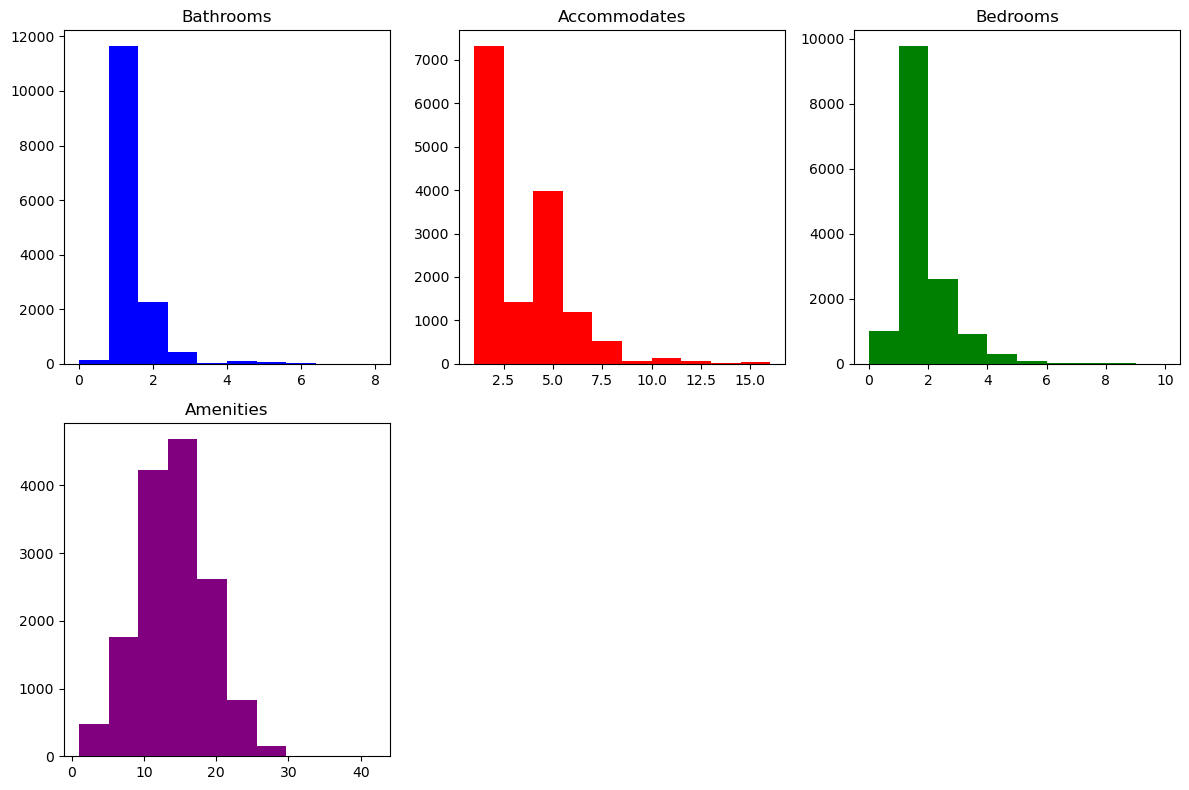

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns

# Plot data on the subplots
axs[0, 0].hist(df1['Bathrooms'], color='blue')
axs[0, 0].set_title('Bathrooms')

axs[0, 1].hist(df1['Accommodates'], color='red')
axs[0, 1].set_title('Accommodates')

axs[0, 2].hist(df1['Bedrooms'], color='green')
axs[0, 2].set_title('Bedrooms')

axs[1, 0].hist(df1['Amenities'], color='purple')
axs[1, 0].set_title('Amenities')

#axs[1, 1].plot(x, y5, color='orange')
#axs[1, 1].set_title('Log(x + 1)')

# Esconder subplots vacíos
axs[1, 1].axis('off')
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

In [10]:
 # No se observan muchos, pero vamos a ver cuántos son
bdrms = df1.sort_values(by='Bedrooms')
bdrms['Bedrooms'].value_counts(sort=False)

outliers = {
    'Bathrooms': 6,
    'Accommodates': 14,
    'Bedrooms': 6,
    'Amenities': 30
}

outlrs = [len(df1[df1[x]>outliers[x]]) for x in outliers.keys()]
outlrs

[12, 49, 29, 8]

No son muchos outliers, se pueden eliminar. Muchos de estos valores no me parecen outliers, ya que no están tan alejados del rango de valores, pero se pueden limpiar

In [11]:
df2 = df1
for x in outliers.keys():
    df2 = df2[df2[x]<outliers[x]]
df1.shape[0], df2.shape[0]

(14780, 14576)

Volvemos a buscar outliers

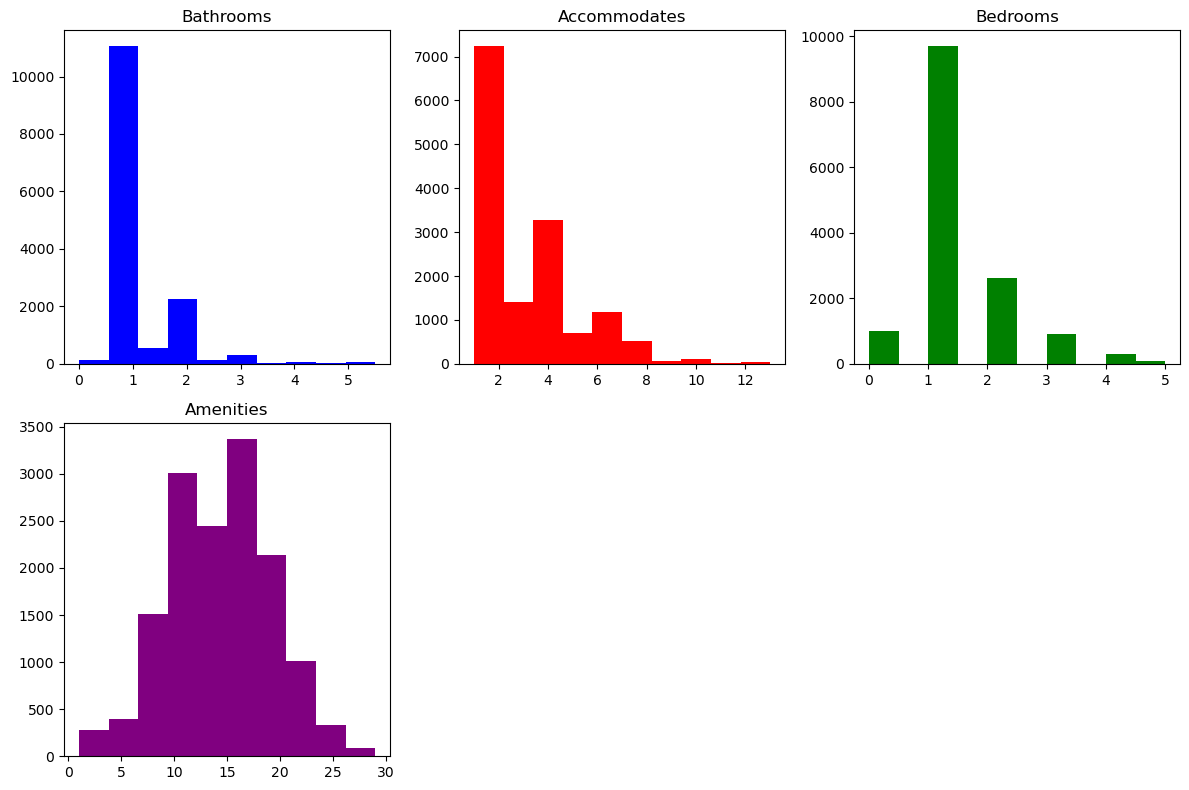

In [12]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

axs[0, 0].hist(df2['Bathrooms'], color='blue')
axs[0, 0].set_title('Bathrooms')

axs[0, 1].hist(df2['Accommodates'], color='red')
axs[0, 1].set_title('Accommodates')

axs[0, 2].hist(df2['Bedrooms'], color='green')
axs[0, 2].set_title('Bedrooms')

axs[1, 0].hist(df2['Amenities'], color='purple')
axs[1, 0].set_title('Amenities')

#axs[1, 1].plot(x, y5, color='orange')
#axs[1, 1].set_title('Log(x + 1)')

axs[1, 1].axis('off')
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

In [13]:
#df2.info()
df3 = df2
df2['Price'].value_counts()
df2.dropna(subset=['Price'], inplace=True)
df2.info()
df2.to_csv('df2.csv', sep=';')

<class 'pandas.core.frame.DataFrame'>
Index: 14563 entries, 0 to 14779
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Host ID                 14563 non-null  int64  
 1   Neighbourhood Cleansed  14563 non-null  object 
 2   Property Type           14563 non-null  object 
 3   Room Type               14563 non-null  object 
 4   Accommodates            14563 non-null  int64  
 5   Bathrooms               14563 non-null  float64
 6   Bedrooms                14563 non-null  float64
 7   Beds                    14552 non-null  float64
 8   Bed Type                14563 non-null  object 
 9   Amenities               14563 non-null  int64  
 10  Price                   14563 non-null  float64
 11  Guests Included         14563 non-null  int64  
 12  Extra People            14563 non-null  int64  
 13  Number of Reviews       14563 non-null  int64  
 14  Review Scores Rating    11336 non-null  flo

In [14]:
corr = df2.corr(numeric_only=True)
X = df2.drop('Price', axis=1)
y = df2['Price']
X.shape, y.shape, corr, y.count()

df4 = df2.copy()

def codig_variables_media(var_name, target_name, df_):
    vals = df_[var_name].unique()
    mean = df_.groupby(var_name)[target_name].mean()
    for val in vals:
        df_.loc[df_[var_name] == val,var_name] = mean[val]

def cat_to_num(df_):
    cat_cols = list(df_.select_dtypes(include=['object']).columns)
    for var in cat_cols:
        codig_variables_media(var, 'Price', df_)

cat_to_num(df4)



#vals = df4['Property Type'].unique()
#mean = df.groupby('Property Type')['Price'].mean()
#for val in vals:
#    df4[df4['Property Type'] == val]['Property Type'] = mean[val]
#vals, mean['Apartment']
#df4.loc[df4['Property Type'] == 'Loft','Property Type'] = 1
#df4.loc[df4['Property Type'] == 1]
df2.head(2), df4.head(2)
corr = df4.corr(numeric_only=True)
X = df4.drop('Price', axis=1)
y = df4['Price']
X.shape, y.shape, corr, y.count()

((14563, 16),
 (14563,),
                          Host ID  Accommodates  Bathrooms  Bedrooms      Beds  \
 Host ID                 1.000000     -0.101363  -0.058528 -0.074285 -0.077476   
 Accommodates           -0.101363      1.000000   0.366439  0.704979  0.822419   
 Bathrooms              -0.058528      0.366439   1.000000  0.470800  0.401447   
 Bedrooms               -0.074285      0.704979   0.470800  1.000000  0.705931   
 Beds                   -0.077476      0.822419   0.401447  0.705931  1.000000   
 Amenities              -0.091492      0.207734   0.130734  0.148992  0.157701   
 Price                  -0.048407      0.488285   0.341519  0.456150  0.403796   
 Guests Included        -0.077100      0.556175   0.197809  0.416350  0.443377   
 Extra People           -0.085405      0.254384   0.058520  0.130318  0.186569   
 Number of Reviews      -0.246655      0.069121  -0.071616 -0.043895  0.026326   
 Review Scores Rating    0.024228     -0.059775   0.007004  0.012829 -0.0

Ahora analizo correlación usando Seaborn. Más gráfico. La correlación más fuerte es entre Accomodates y Beds. No creo que signifique nada en este caso

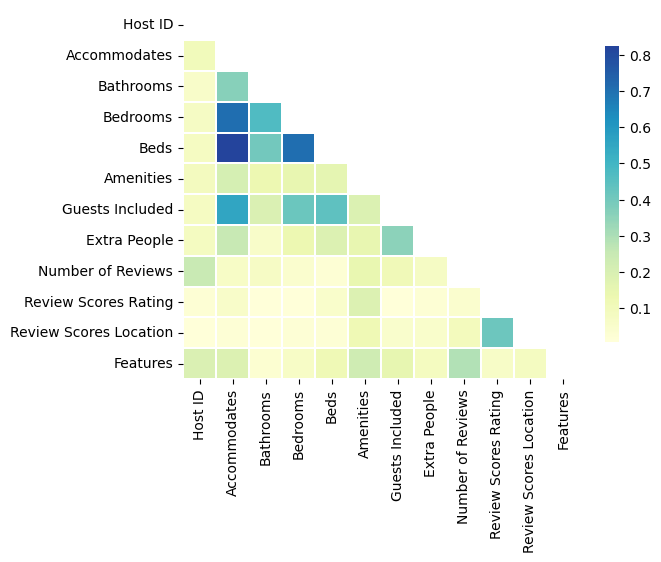

In [15]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

corr = np.abs(X.corr(numeric_only=True))

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, center=0.5,
            linewidths=.2, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

# Separar los conjuntos de train y test

Me parece mejor guardar test DESPUÉS de haber hecho todas las modificaciones. Aunque lo guarde completo, las columnas que no uso me podrían dar problemas después, además que el modelo las va a ignorar. 
Es cierto que para rellenar nulos con valor medio o mediana, por ejemplo, puede convenir sacar estos de los valores únicos del dataset de test. 

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True)

print(f'Cantidad de registros: Training: {X_train.shape[0]} vs Test: {X_test.shape[0]}')


Cantidad de registros: Training: 10922 vs Test: 3641


Ahora vamos a buscar parámetros óptimos

In [17]:
X_train = X_train.fillna(X_train.mean())

In [30]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled, X_train

(array([[ 5.26922594e-01,  2.21697133e+00, -7.86319016e-02, ...,
         -4.02831056e+00,  6.83983152e-01,  2.57695249e-01],
        [ 2.05174388e+00, -3.39777997e-01, -7.86319016e-02, ...,
          1.05498569e+00,  6.83983152e-01,  2.57695249e-01],
        [-3.08445703e-01,  1.53179343e-01, -7.86319016e-02, ...,
         -1.80594961e-15, -2.58747911e-15, -1.65176711e+00],
        ...,
        [ 4.48743842e-01, -1.02095975e+00, -7.86319016e-02, ...,
          6.73738470e-01, -2.22925933e+00,  1.21242643e+00],
        [ 4.16050894e-01, -1.07122569e+00, -7.86319016e-02, ...,
          2.92491252e-01, -7.72638090e-01,  2.57695249e-01],
        [-1.36350969e-01, -1.38429176e-01, -7.86319016e-02, ...,
          1.05498569e+00,  6.83983152e-01, -1.65176711e+00]]),
          Host ID  Neighbourhood Cleansed  Property Type  Room Type  \
 1835    54310958              149.970149      71.330237  92.882872   
 4510   106483362               60.051743      71.330237  92.882872   
 9390    2572847

best mean cross-validation score: -2404.543
best parameters: {'alpha': 0.026366508987303555}


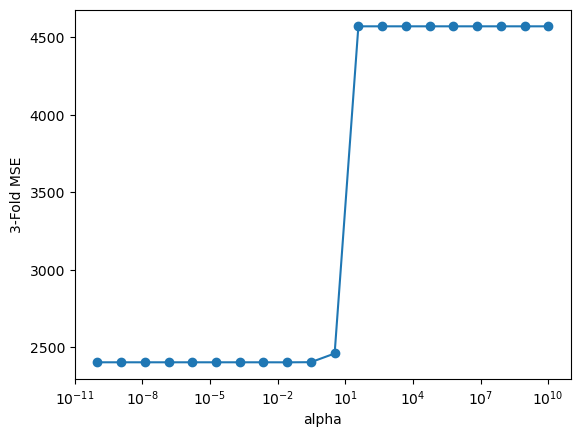

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-10,10,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv=10, verbose=0)
grid.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha')
plt.ylabel('3-Fold MSE')
plt.show()

In [37]:
X_test.isnull().any()

Host ID                   False
Neighbourhood Cleansed    False
Property Type             False
Room Type                 False
Accommodates              False
Bathrooms                 False
Bedrooms                  False
Beds                       True
Bed Type                  False
Amenities                 False
Guests Included           False
Extra People              False
Number of Reviews         False
Review Scores Rating       True
Review Scores Location     True
Features                  False
dtype: bool

In [38]:
X_test = X_test.fillna(X_test.mean())
X_test.isnull().any()

Host ID                   False
Neighbourhood Cleansed    False
Property Type             False
Room Type                 False
Accommodates              False
Bathrooms                 False
Bedrooms                  False
Beds                      False
Bed Type                  False
Amenities                 False
Guests Included           False
Extra People              False
Number of Reviews         False
Review Scores Rating      False
Review Scores Location    False
Features                  False
dtype: bool

In [43]:
X_test_scaled = scaler.transform(X_test)

from sklearn.metrics import mean_squared_error

mejor_alpha = grid.best_params_['alpha']#*10 #*100
model = Lasso(alpha = mejor_alpha).fit(X_train_scaled,y_train)

y_train_Lasso = model.predict(X_train_scaled)
y_test_Lasso  = model.predict(X_test_scaled)
mse_train_lasso = mean_squared_error(y_train,y_train_Lasso)
mse_test_lasso = mean_squared_error(y_test,y_test_Lasso)

print('MSE Lasso (train): %0.5g' % mse_train_lasso)
print('MSE Lasso (test) : %0.5g' % mse_test_lasso)

w = model.coef_
features = X_test.columns
for f,wi in zip(features,w):
    print(f,wi)

MSE Lasso (train): 2388.1
MSE Lasso (test) : 2564.5
Host ID 2.540046131631064
Neighbourhood Cleansed 27.621266525916248
Property Type 0.49295991836733966
Room Type 11.545757899189313
Accommodates 13.340846925197697
Bathrooms 7.1645228554184195
Bedrooms 10.975472620967022
Beds -2.5821700701551165
Bed Type 0.689381959189642
Amenities -1.4664377194172666
Guests Included 1.101942392126688
Extra People -1.6578257814218498
Number of Reviews -4.4782929263559454
Review Scores Rating 3.5155462533333264
Review Scores Location -0.03543839510643865
Features -0.0


In [46]:
y_test.head(2)

13839    55.0
6954     70.0
Name: Price, dtype: float64

In [48]:
df['Price'].describe()

count    14763.000000
mean        73.561471
std         72.062050
min          9.000000
25%         34.000000
50%         55.000000
75%         86.000000
max        999.000000
Name: Price, dtype: float64

Probando regresor logístico

In [63]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(multi_class='multinomial').fit(X_train_scaled, y_train)

/media/tropix/data/cursos/keepcoding/Bootcamp_IA_Fullstack/resources/anaconda_install/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


La regresión logística da error porque el dataset es muy grande

Probando GradientRegressor

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

n_iterations = [500, 1000, 3000]
learningRate = [0.01, 0.1]

param_grid = {'n_estimators': n_iterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...............learning_rate=0.01, n_estimators=500; total time=   4.8s
[CV] END ...............learning_rate=0.01, n_estimators=500; total time=   4.9s
[CV] END ...............learning_rate=0.01, n_estimators=500; total time=   4.9s
[CV] END ...............learning_rate=0.01, n_estimators=500; total time=   4.6s
[CV] END ...............learning_rate=0.01, n_estimators=500; total time=   4.9s
[CV] END ..............learning_rate=0.01, n_estimators=1000; total time=   9.8s
[CV] END ..............learning_rate=0.01, n_estimators=1000; total time=   9.9s
[CV] END ..............learning_rate=0.01, n_estimators=1000; total time=  10.5s
[CV] END ..............learning_rate=0.01, n_estimators=1000; total time=  11.9s
[CV] END ..............learning_rate=0.01, n_estimators=1000; total time=  11.0s
[CV] END ..............learning_rate=0.01, n_estimators=3000; total time=  30.4s
[CV] END ..............learning_rate=0.01, n_esti

In [54]:
mejor_niter = grid.best_params_['n_estimators']
mejor_lrate = grid.best_params_['learning_rate']


gradreg = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=mejor_lrate, n_estimators=mejor_niter)
gradreg.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=500, random_state=0)

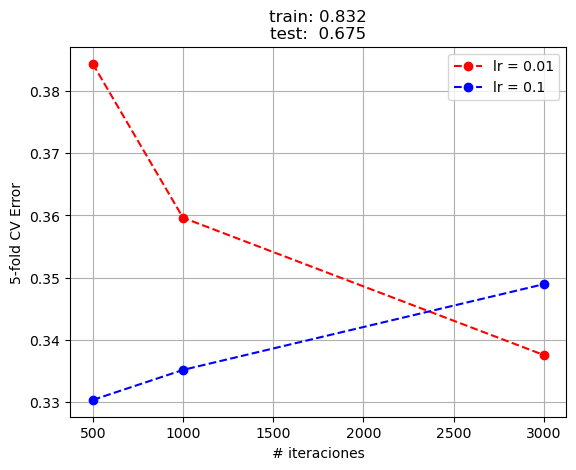

In [61]:
error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(n_iterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(n_iterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(gradreg.score(X_train,y_train),gradreg.score(X_test,y_test)))
plt.grid()
plt.show()

Importancia de las variables

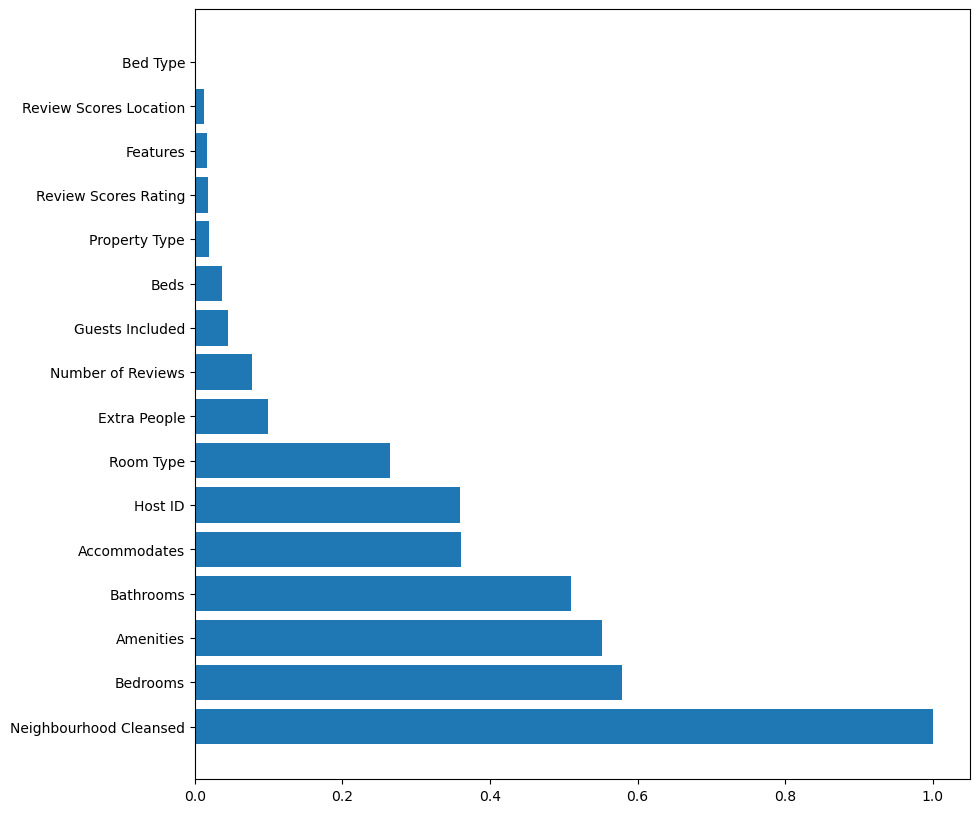

In [65]:
importances = gradreg.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,10))

plt.barh(range(X_train.shape[1]),importances[indices])

plt.yticks(range(X_train.shape[1]),features[indices])

plt.show()